In [1]:
import torch
from torchvision import transforms

In [4]:
model = torch.hub.load('pytorch/vision:v0.6.0', 'mobilenet_v2', pretrained=True)
model.eval()

Using cache found in /home/dauce/.cache/torch/hub/pytorch_vision_v0.6.0


ImportError: cannot import name 'resnext50_32x4d' from 'torchvision.models.resnet' (/usr/local/lib/python3.7/dist-packages/torchvision/models/resnet.py)

In [3]:
torch.__version__

'1.4.0'

In [3]:
# Download an example image from the pytorch website
import urllib
#url, filename = ("https://github.com/pytorch/hub/raw/master/dog.jpg", "dog.jpg")
url, filename = ("https://media.lesechos.com/api/v1/images/view/5e3126f2d286c252a94951e7/1280x720/0602656207432-web-tete.jpg", "camembert.jpg")
#url, filename = ("https://pbs.twimg.com/profile_images/822547732376207360/5g0FC8XX_400x400.jpg", "obama.jpg")
#url, filename = ("https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Mercedes-Benz_Citaro_C2_n%C2%B0401_%28vue_avant%29_-_Sibra_%28Gare_Quai_Nord%2C_Annecy_%2A_automne_2018%29.jpg/1200px-Mercedes-Benz_Citaro_C2_n%C2%B0401_%28vue_avant%29_-_Sibra_%28Gare_Quai_Nord%2C_Annecy_%2A_automne_2018%29.jpg", "bus.jpg")
#url, filename = ("https://www.abc.net.au/news/image/8224014-3x2-940x627.jpg","pieton.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [4]:
from PIL import Image

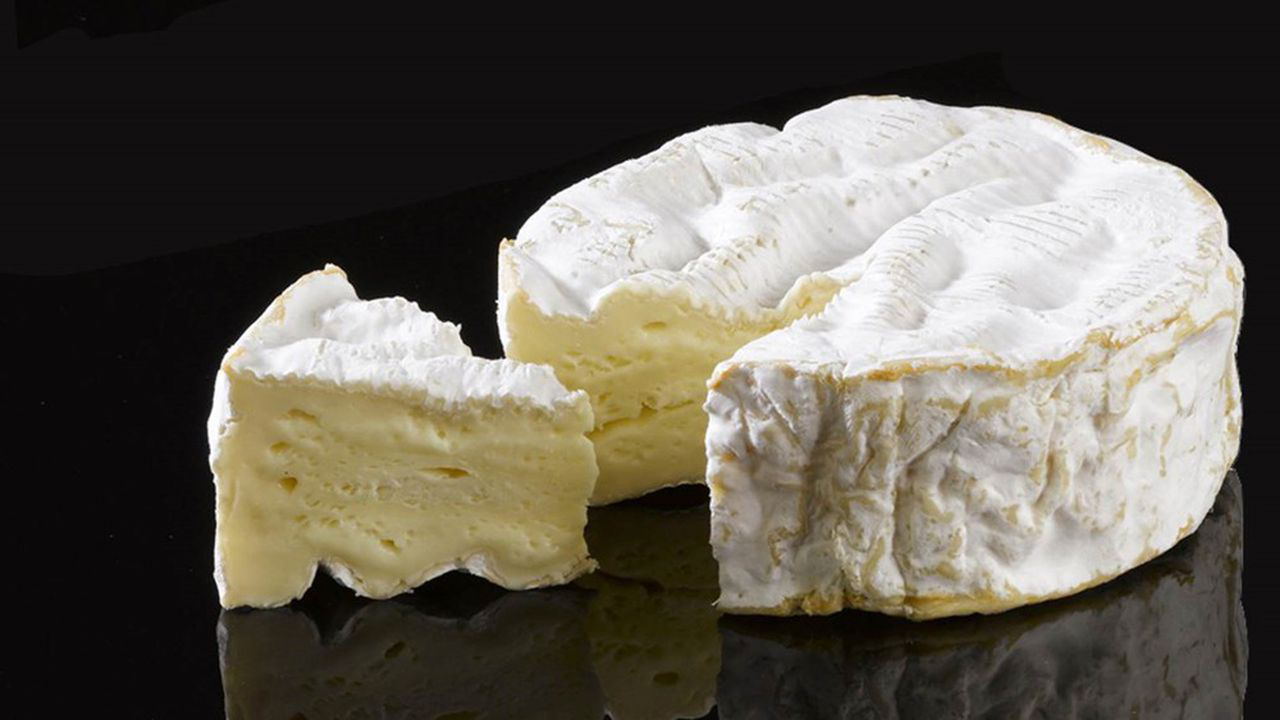

In [5]:
input_image = Image.open(filename)
input_image

In [6]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

In [7]:
input_tensor.shape

torch.Size([3, 224, 224])

In [8]:
input_batch.shape

torch.Size([1, 3, 224, 224])

In [9]:
with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.


tensor([-1.7903e+00, -5.1079e+00, -4.4264e+00, -2.7984e+00, -1.6932e+00,
        -2.0405e-01, -1.6111e+00, -2.1158e+00, -1.1297e+00, -2.9146e+00,
        -2.8723e+00, -2.7853e+00, -4.7188e+00, -5.5121e+00, -2.8669e+00,
        -3.5297e+00, -2.6271e+00, -3.0170e+00, -2.9341e+00, -1.2107e+00,
        -1.9791e+00, -4.3356e+00, -1.7839e+00, -2.8773e+00, -5.0789e-01,
        -1.9898e+00, -1.5552e+00, -1.5737e+00, -1.4720e+00, -5.5853e+00,
        -2.1567e+00, -1.4196e+00, -9.5199e-01,  6.9782e-02,  1.1316e-01,
        -1.6238e+00,  7.4077e-01,  1.1503e+00,  1.6113e+00, -7.7435e-01,
         1.6650e+00, -1.0563e+00, -3.1933e+00,  1.6605e-01, -1.1926e+00,
        -3.2346e+00,  1.9572e-01, -8.4332e-01, -1.7625e+00,  6.5986e-01,
         8.9909e-01,  1.4920e+00, -1.3917e+00, -4.0439e+00, -8.3754e-01,
        -3.7027e+00, -1.8917e+00, -3.9418e+00, -1.6445e+00, -1.0443e+00,
        -1.4555e+00, -1.9379e-01,  1.1464e+00, -1.0997e+00, -3.0199e+00,
        -1.1120e+00,  1.8291e-01, -2.9972e+00, -7.6

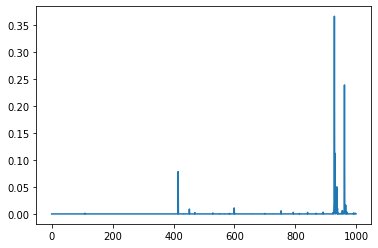

In [10]:
import matplotlib.pyplot as plt
p_out = torch.nn.functional.softmax(output[0], dim=0)
plt.plot(p_out)
plt.show()

After downloading this URL used by keras:
https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json

In [11]:
import json
f = open("imagenet_class_index.json", 'r')
class_idx = json.load(f)

In [12]:
idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

for idx in list(output[0].sort()[1])[-1:-10:-1]:
    print(int(idx), idx2label[idx], 'p =', float(p_out[idx]))

928 ice_cream p = 0.3671410083770752
961 dough p = 0.23954451084136963
930 French_loaf p = 0.11250580102205276
415 bakery p = 0.07845943421125412
936 head_cabbage p = 0.0502503477036953
927 trifle p = 0.0202532559633255
965 burrito p = 0.016438402235507965
931 bagel p = 0.01169227808713913
599 honeycomb p = 0.011120774783194065
